In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
from pathlib import Path
from fastai.vision.all import *


path = Path('/kaggle/input/pnevmoniya/train')
path.ls()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(#2) [Path('/kaggle/input/pnevmoniya/train/PNEUMONIA'),Path('/kaggle/input/pnevmoniya/train/NORMAL')]

In [4]:
file=get_image_files(path)


In [5]:
transports = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.1, seed=12),
    get_y = parent_label,
    item_tfms = Resize(224)
)

In [6]:
dls = transports.dataloaders(path)

In [8]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 200MB/s] 


epoch,train_loss,valid_loss,accuracy,time
0,0.421822,0.170918,0.944338,00:59


epoch,train_loss,valid_loss,accuracy,time
0,0.160196,0.123713,0.965451,00:54
1,0.088353,0.086327,0.982726,00:57
2,0.041556,0.084649,0.975048,01:07


In [9]:
learn1 = vision_learner(dls, resnet50, metrics=accuracy)
learn1.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 226MB/s] 


epoch,train_loss,valid_loss,accuracy,time
0,0.432320,0.207424,0.934741,01:01


epoch,train_loss,valid_loss,accuracy,time
0,0.192043,0.163969,0.963532,01:01
1,0.112273,0.079486,0.971209,01:01
2,0.062607,0.069781,0.975048,01:02


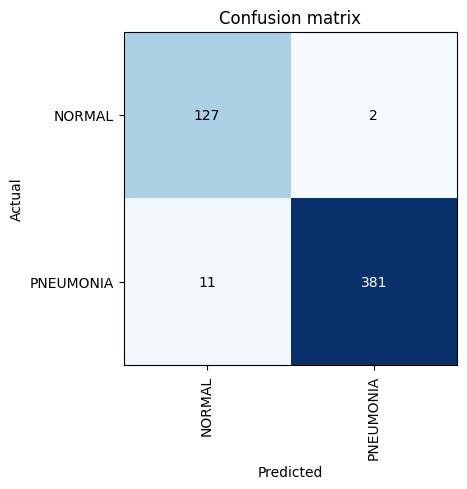

In [10]:
inter = ClassificationInterpretation.from_learner(learn)
inter.plot_confusion_matrix()

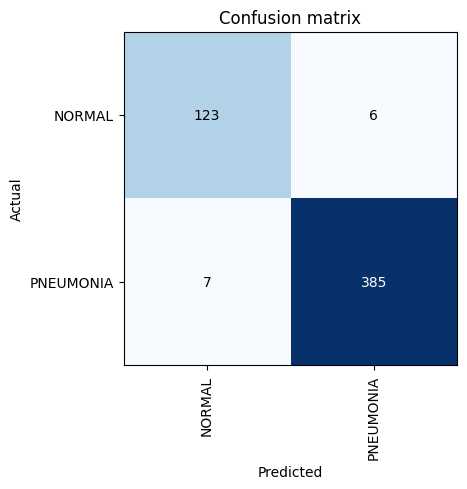

In [11]:
inter = ClassificationInterpretation.from_learner(learn1)
inter.plot_confusion_matrix()

In [ ]:
df_sample = pd.read_csv("/kaggle/input/pnevmoniya/sample_solution.csv")

df_sample['labels'] = [np.array(learn.predict(PILImage.create(Path(f"/kaggle/input/pnevmoniya/test/{df_sample.loc[x, 'id']}")))[2][1]) for x in range(len(df_sample))]

df_sample.to_csv('Yakuniy_natija1.csv', index=False)